In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [3]:
#import data from FAO of the United Nations
FAO = pd.read_csv('FAOSTAT_1.csv')
FAO

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,10,Australia,5312,Area harvested,108,Cereals nes,1961,1961,NaN,NaN,NaN,NaN
1,QC,Crops,10,Australia,5312,Area harvested,108,Cereals nes,1962,1962,NaN,NaN,NaN,NaN
2,QC,Crops,10,Australia,5312,Area harvested,108,Cereals nes,1963,1963,NaN,NaN,NaN,NaN
3,QC,Crops,10,Australia,5312,Area harvested,108,Cereals nes,1964,1964,NaN,NaN,NaN,NaN
4,QC,Crops,10,Australia,5312,Area harvested,108,Cereals nes,1965,1965,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,QC,Crops,231,United States of America,5510,Production,15,Wheat,2015,2015,tonnes,55839540.0,NaN,Official data
3536,QC,Crops,231,United States of America,5510,Production,15,Wheat,2016,2016,tonnes,62831507.0,NaN,Official data
3537,QC,Crops,231,United States of America,5510,Production,15,Wheat,2017,2017,tonnes,47379810.0,NaN,Official data
3538,QC,Crops,231,United States of America,5510,Production,15,Wheat,2018,2018,tonnes,51305540.0,NaN,Official data


In [4]:
FAO1 = pd.read_csv('FAOSTAT_2.csv')
FAO1

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SC,Crops,10,Australia,5910,Export Quantity,1199.9,Cereals nes,2014,2014,tonnes,226.0,Im,FAO data based on imputation methodology
1,SC,Crops,10,Australia,5910,Export Quantity,1199.9,Cereals nes,2015,2015,tonnes,664.0,NaN,Official data
2,SC,Crops,10,Australia,5910,Export Quantity,1199.9,Cereals nes,2016,2016,tonnes,168.0,NaN,Official data
3,SC,Crops,10,Australia,5910,Export Quantity,1199.9,Cereals nes,2017,2017,tonnes,1435.0,Im,FAO data based on imputation methodology
4,SC,Crops,10,Australia,5910,Export Quantity,1199.9,Cereals nes,2018,2018,tonnes,90.0,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,SC,Crops,231,United States of America,5016,Loss,111.0,Wheat,2014,2014,tonnes,2603559.0,Im,FAO data based on imputation methodology
146,SC,Crops,231,United States of America,5016,Loss,111.0,Wheat,2015,2015,tonnes,2612307.0,Im,FAO data based on imputation methodology
147,SC,Crops,231,United States of America,5016,Loss,111.0,Wheat,2016,2016,tonnes,2912701.0,Im,FAO data based on imputation methodology
148,SC,Crops,231,United States of America,5016,Loss,111.0,Wheat,2017,2017,tonnes,2176437.0,Im,FAO data based on imputation methodology


In [5]:
PP = pd.read_csv('FAOSTAT_3.csv')
PPV =PP.loc[:, ["Area", "Element", "Item", "Year", "Value", "Unit"]]
PPV

,Area,Element,Item,Year,Value,Unit
0,Australia,Producer Price (USD/tonne),Cereals nes,1991,NaN,NaN
1,Australia,Producer Price (USD/tonne),Maize,1991,129.3,USD
2,Australia,Producer Price (USD/tonne),Millet,1991,185.4,USD
3,Australia,Producer Price (USD/tonne),"Rice, paddy",1991,137.1,USD
4,Australia,Producer Price (USD/tonne),Wheat,1991,102.8,USD
...,...,...,...,...,...,...
575,United States of America,Producer Price (USD/tonne),Cereals nes,2019,NaN,NaN
576,United States of America,Producer Price (USD/tonne),Maize,2019,151.0,USD
577,United States of America,Producer Price (USD/tonne),Millet,2019,220.0,USD
578,United States of America,Producer Price (USD/tonne),"Rice, paddy",2019,287.0,USD


In [6]:
DF=pd.concat([FAO,FAO1,PP])
DF

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Item Code (CPC),Item Code,Months Code,Months
0,QC,Crops,10,Australia,5312,Area harvested,108.0,Cereals nes,1961,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QC,Crops,10,Australia,5312,Area harvested,108.0,Cereals nes,1962,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,QC,Crops,10,Australia,5312,Area harvested,108.0,Cereals nes,1963,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QC,Crops,10,Australia,5312,Area harvested,108.0,Cereals nes,1964,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QC,Crops,10,Australia,5312,Area harvested,108.0,Cereals nes,1965,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,PP,Producer Prices,231,United States of America,5532,Producer Price (USD/tonne),NaN,Cereals nes,2019,2019,NaN,NaN,NaN,NaN,NaN,108.0,7021.0,Annual value
576,PP,Producer Prices,231,United States of America,5532,Producer Price (USD/tonne),NaN,Maize,2019,2019,USD,151.0,NaN,Official data,NaN,56.0,7021.0,Annual value
577,PP,Producer Prices,231,United States of America,5532,Producer Price (USD/tonne),NaN,Millet,2019,2019,USD,220.0,NaN,Official data,NaN,79.0,7021.0,Annual value
578,PP,Producer Prices,231,United States of America,5532,Producer Price (USD/tonne),NaN,"Rice, paddy",2019,2019,USD,287.0,NaN,Official data,NaN,27.0,7021.0,Annual value


In [7]:
A=DF.loc[:, ["Domain", "Area", "Element", "Item", "Year", "Unit", "Value" ]]

In [44]:
A

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Australia,Area harvested,Cereals nes,1961,NaN,NaN
1,Crops,Australia,Area harvested,Cereals nes,1962,NaN,NaN
2,Crops,Australia,Area harvested,Cereals nes,1963,NaN,NaN
3,Crops,Australia,Area harvested,Cereals nes,1964,NaN,NaN
4,Crops,Australia,Area harvested,Cereals nes,1965,NaN,NaN
...,...,...,...,...,...,...,...
575,Producer Prices,United States of America,Producer Price (USD/tonne),Cereals nes,2019,NaN,NaN
576,Producer Prices,United States of America,Producer Price (USD/tonne),Maize,2019,USD,151.0
577,Producer Prices,United States of America,Producer Price (USD/tonne),Millet,2019,USD,220.0
578,Producer Prices,United States of America,Producer Price (USD/tonne),"Rice, paddy",2019,USD,287.0


In [8]:
Data =A.dropna( axis=0, how="any", thresh=None, subset=None, inplace=False)
Data

,Domain,Area,Element,Item,Year,Unit,Value
177,Crops,Australia,Area harvested,Maize,1961,ha,74780.0
178,Crops,Australia,Area harvested,Maize,1962,ha,85201.0
179,Crops,Australia,Area harvested,Maize,1963,ha,84776.0
180,Crops,Australia,Area harvested,Maize,1964,ha,86909.0
181,Crops,Australia,Area harvested,Maize,1965,ha,85923.0
...,...,...,...,...,...,...,...
574,Producer Prices,United States of America,Producer Price (USD/tonne),Wheat,2018,USD,189.0
576,Producer Prices,United States of America,Producer Price (USD/tonne),Maize,2019,USD,151.0
577,Producer Prices,United States of America,Producer Price (USD/tonne),Millet,2019,USD,220.0
578,Producer Prices,United States of America,Producer Price (USD/tonne),"Rice, paddy",2019,USD,287.0


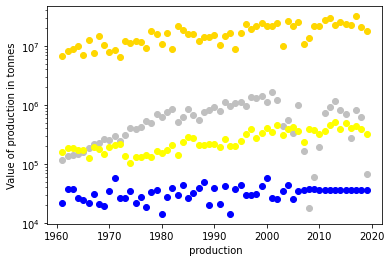

In [50]:
#production quantity in Australia.
P =  Data[Data. Element == 'Production']
AP = P[P. Area == 'Australia']

#Wheat
A1 = AP[AP. Item == 'Wheat']
year = A1['Year']
value = A1['Value']
plt.scatter(year, value, color = 'gold')
plt.yscale('log')
plt.xlabel('Wheat production')
plt.ylabel('Value of production in tonnes')


#Rice, peddy
A2 = AP[AP. Item == 'Rice, paddy']
year = A2['Year']
value = A2['Value']
plt.scatter(year, value, color = 'silver')
plt.yscale('log')
plt.xlabel('Rice, peddy production')
plt.ylabel('Value of production in tonnes')


#Maize
A3 = AP[AP. Item == 'Maize']
year = A3['Year']
value = A3['Value']
plt.scatter(year, value, color = 'Yellow')
plt.yscale('log')
plt.xlabel('Maize production')
plt.ylabel('Value of production in tonnes')

#Millet
A4 = AP[AP. Item == 'Millet']
year = A4['Year']
value = A4['Value']
plt.scatter(year, value, color = 'blue')
plt.yscale('log')
plt.xlabel(' production')
plt.ylabel('Value of production in tonnes')
plt.show()

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Australia Production')

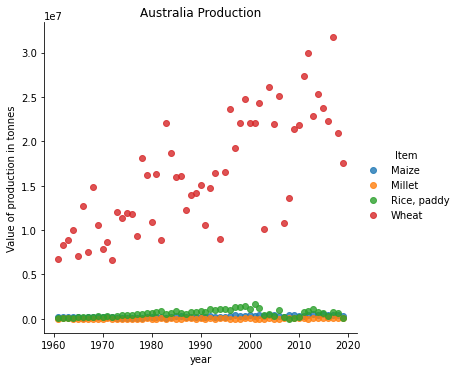

In [14]:
P =  Data[Data. Element == 'Production']
AP = P[P. Area == 'Australia']
sns.lmplot("Year","Value", AP, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of production in tonnes')
plt.title('Australia Production')

<AxesSubplot:xlabel='Item', ylabel='Value'>

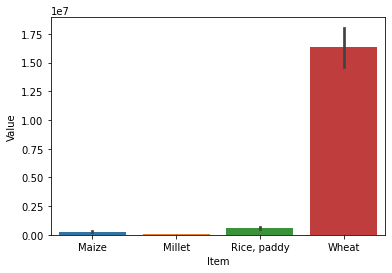

In [53]:
sns.barplot(data=AP, x="Item", y='Value')

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


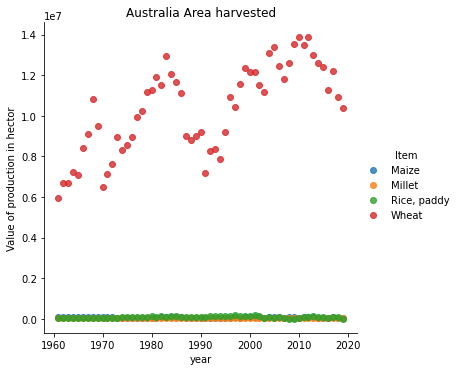

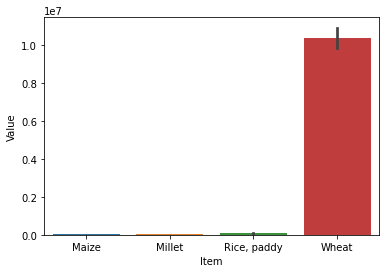

In [18]:
Ah =  Data[Data. Element == 'Area harvested']
Ah1 = Ah[Ah. Area == 'Australia']
sns.lmplot("Year","Value", Ah1, hue = "Item", fit_reg = False)
plt.title('Australia harvested Area')
plt.xlabel('year')
plt.ylabel('Value of production in hector')
plt.title('Australia Area harvested')
plt.show()

sns.barplot(data=Ah1, x="Item", y='Value')
plt.show()


C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


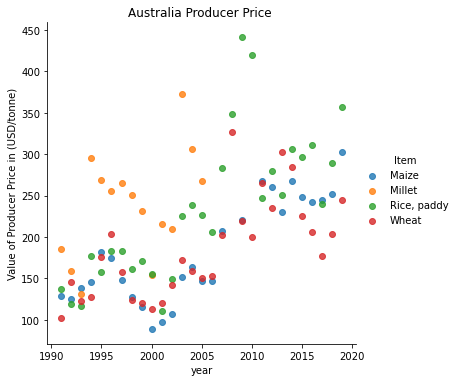

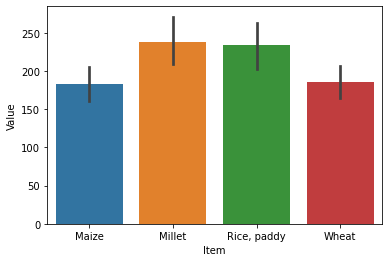

In [27]:
App =  Data[Data. Element == 'Producer Price (USD/tonne)']
App1 = App[App. Area == 'Australia']
sns.lmplot("Year","Value", App1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of Producer Price in (USD/tonne)')
plt.title('Australia Producer Price ')
plt.show()

sns.barplot(data=App1, x="Item", y='Value')
plt.show()


C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


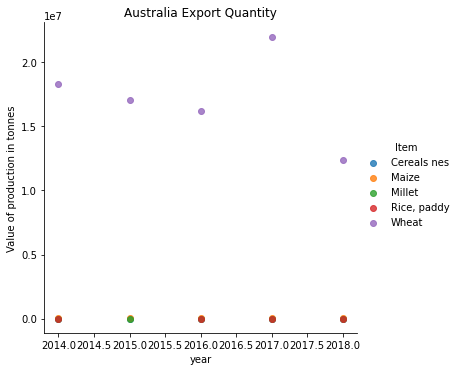

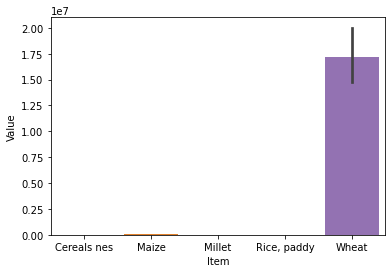

In [19]:
Aex =  Data[Data. Element == 'Export Quantity']
Aex1 = Aex[Aex. Area == 'Australia']
sns.lmplot("Year","Value", Aex1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of production in tonnes')
plt.title('Australia Export Quantity')
plt.show()

sns.barplot(data=Aex1, x="Item", y='Value')
plt.show()


C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


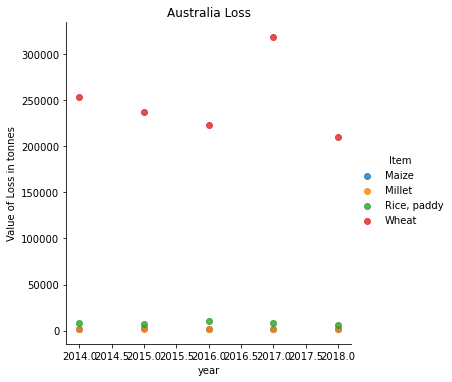

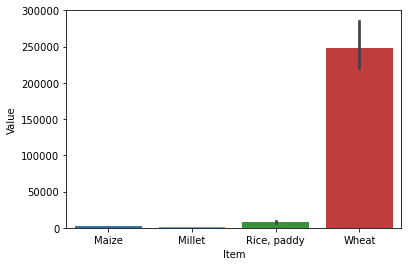

In [26]:
Al =  Data[Data. Element == 'Loss']
Al1 = Al[Al. Area == 'Australia']
sns.lmplot("Year","Value", Al1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of Loss in tonnes')
plt.title('Australia Loss')
plt.show()

sns.barplot(data=Al1, x="Item", y='Value')
plt.show()

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


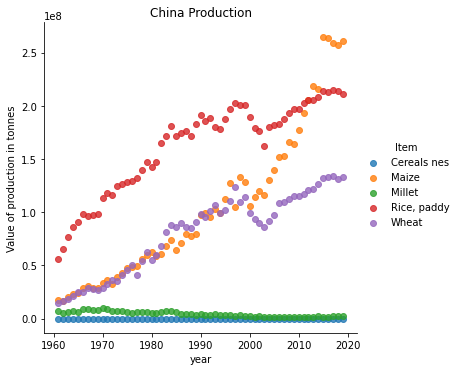

<AxesSubplot:xlabel='Item', ylabel='Value'>

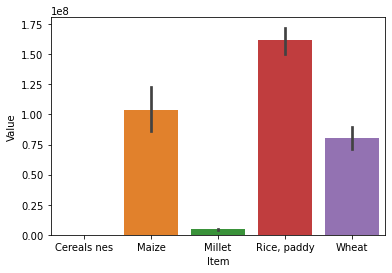

In [15]:
P =  Data[Data. Element == 'Production']
CP = P[P. Area == 'China']
sns.lmplot("Year","Value", CP, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of production in tonnes')
plt.title('China Production')
plt.show()
sns.barplot(data=CP, x="Item", y='Value')

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


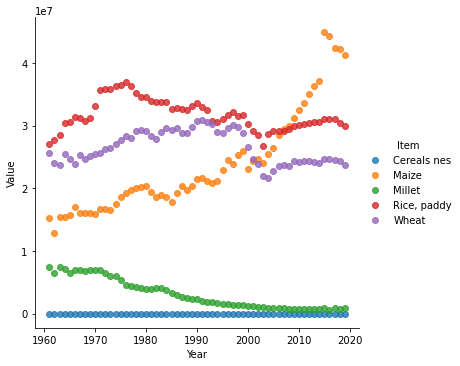

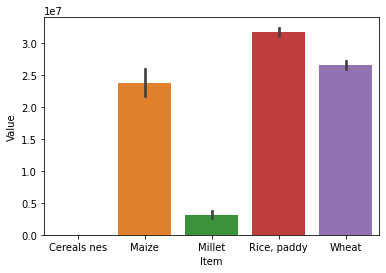

In [70]:
Ah =  Data[Data. Element == 'Area harvested']
Ch1 = Ah[Ah. Area == 'China']
sns.lmplot("Year","Value", Ch1, hue = "Item", fit_reg = False)
plt.show()

sns.barplot(data=Ch1, x="Item", y='Value')
plt.show()

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


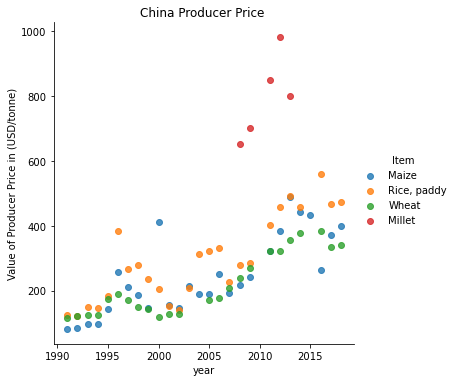

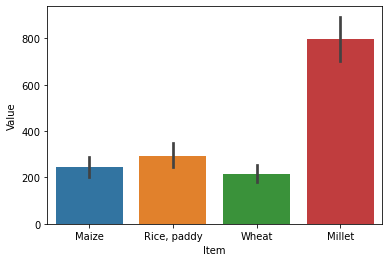

In [28]:
App =  Data[Data. Element == 'Producer Price (USD/tonne)']
Cpp1 = App[App. Area == 'China']
sns.lmplot("Year","Value", Cpp1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of Producer Price in (USD/tonne)')
plt.title('China Producer Price ')
plt.show()

sns.barplot(data=Cpp1, x="Item", y='Value')
plt.show()

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


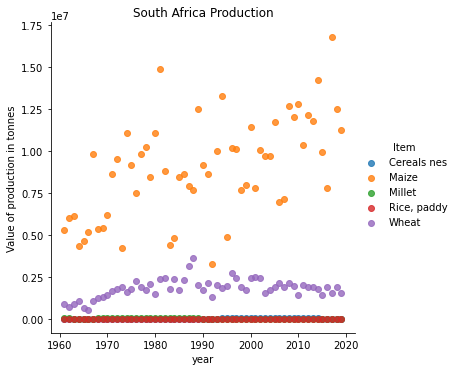

<AxesSubplot:xlabel='Item', ylabel='Value'>

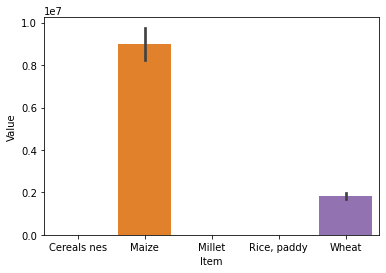

In [16]:
P =  Data[Data. Element == 'Production']
SP = P[P. Area == 'South Africa']
sns.lmplot("Year","Value", SP, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of production in tonnes')
plt.title('South Africa Production')
plt.show()
sns.barplot(data=SP, x="Item", y='Value')

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


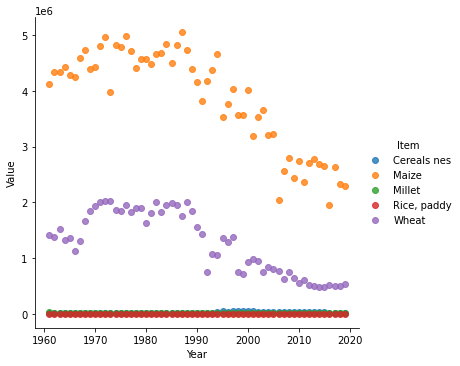

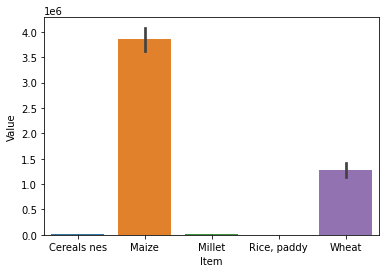

In [77]:
Ah =  Data[Data. Element == 'Area harvested']
Sh1 = Ah[Ah. Area == 'South Africa']
sns.lmplot("Year","Value", Sh1, hue = "Item", fit_reg = False)
plt.show()

sns.barplot(data=Sh1, x="Item", y='Value')
plt.show()

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


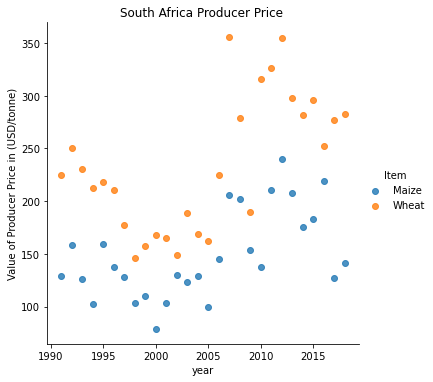

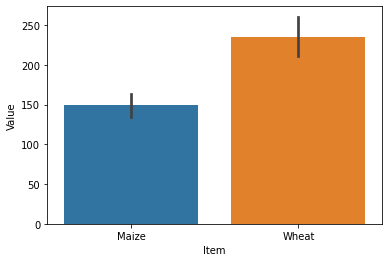

In [29]:
App =  Data[Data. Element == 'Producer Price (USD/tonne)']
Spp1 = App[App. Area == 'South Africa']
sns.lmplot("Year","Value", Spp1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of Producer Price in (USD/tonne)')
plt.title('South Africa Producer Price ')
plt.show()

sns.barplot(data=Spp1, x="Item", y='Value')
plt.show()


C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


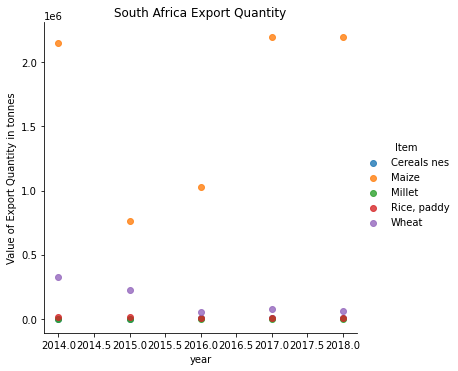

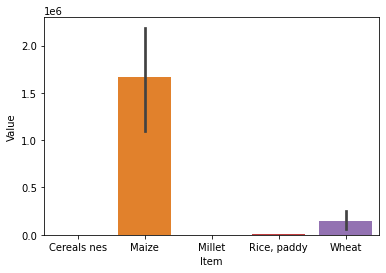

In [20]:
Aex =  Data[Data. Element == 'Export Quantity']
Sex1 = Aex[Aex. Area == 'South Africa']
sns.lmplot("Year","Value", Sex1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of Export Quantity in tonnes')
plt.title('South Africa Export Quantity')
plt.show()

sns.barplot(data=Sex1, x="Item", y='Value')
plt.show()


C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


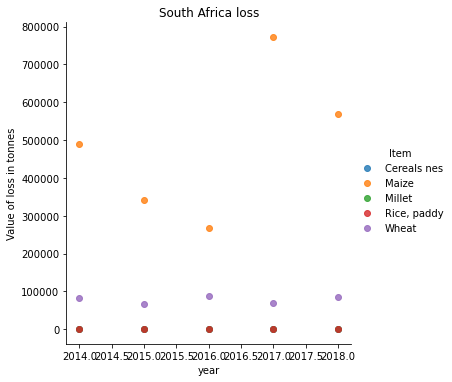

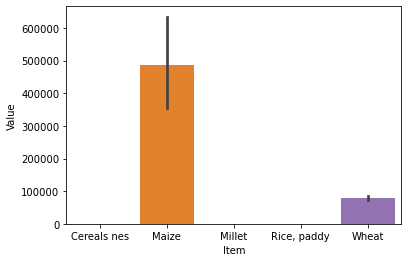

In [24]:
Al =  Data[Data. Element == 'Loss']
Sl1 = Al[Al. Area == 'South Africa']
sns.lmplot("Year","Value", Sl1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of loss in tonnes')
plt.title('South Africa loss')
plt.show()

sns.barplot(data=Sl1, x="Item", y='Value')
plt.show()

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


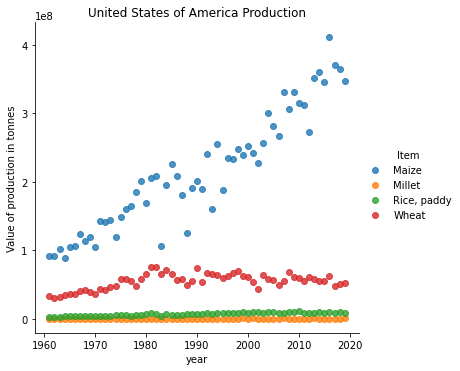

<AxesSubplot:xlabel='Item', ylabel='Value'>

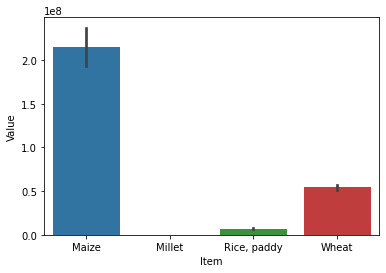

In [17]:
P =  Data[Data. Element == 'Production']
UP = P[P. Area == 'United States of America']
sns.lmplot("Year","Value", UP, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of production in tonnes')
plt.title('United States of America Production')
plt.show()
sns.barplot(data=UP, x="Item", y='Value')

C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


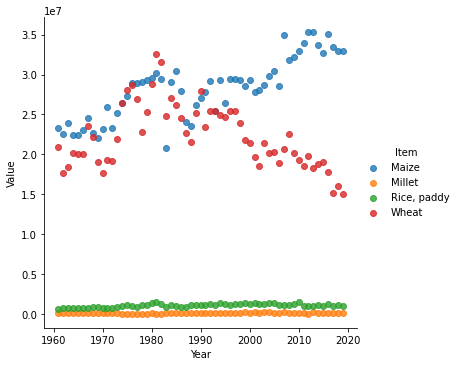

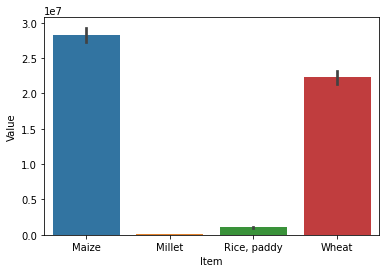

In [82]:
Ah =  Data[Data. Element == 'Area harvested']
Uh1 = Ah[Ah. Area == 'United States of America']
sns.lmplot("Year","Value", Uh1, hue = "Item", fit_reg = False)
plt.show()

sns.barplot(data=Uh1, x="Item", y='Value')
plt.show()

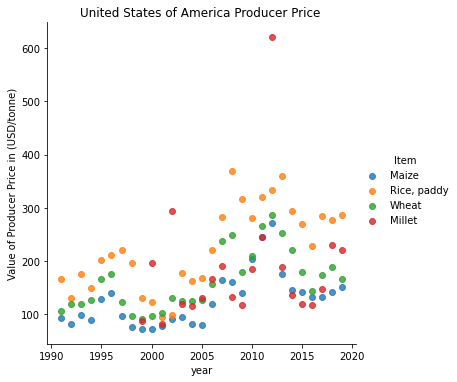

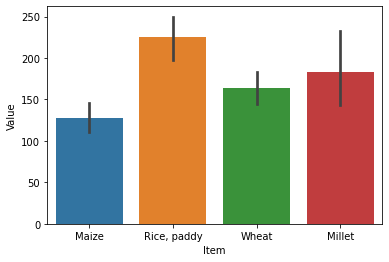

In [40]:
App =  Data[Data. Element == 'Producer Price (USD/tonne)']
Upp1 = App[App. Area == 'United States of America']
sns.lmplot("Year","Value", Upp1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of Producer Price in (USD/tonne)')
plt.title('United States of America Producer Price ')
plt.show()

sns.barplot(data=Upp1, x="Item", y='Value')
plt.show()


C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


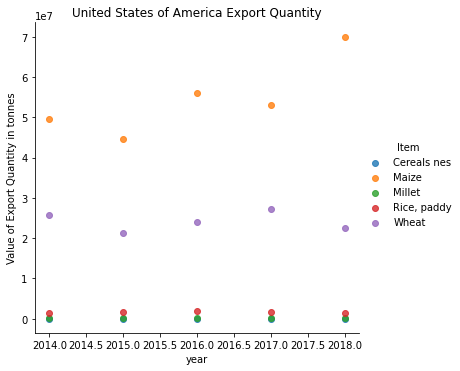

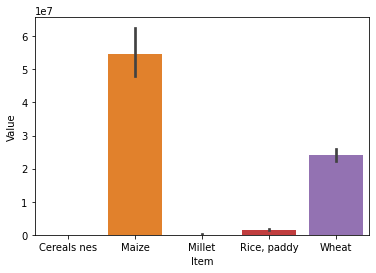

In [21]:
Aex =  Data[Data. Element == 'Export Quantity']
Uex1 = Aex[Aex. Area == 'United States of America']
sns.lmplot("Year","Value", Uex1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of Export Quantity in tonnes')
plt.title('United States of America Export Quantity')
plt.show()

sns.barplot(data=Uex1, x="Item", y='Value')
plt.show()


C:\Users\neels\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


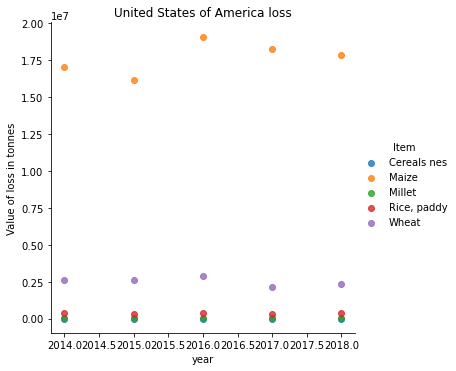

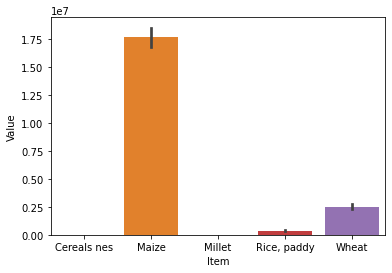

In [25]:
Al =  Data[Data. Element == 'Loss']
Ul1 = Al[Al. Area == 'United States of America']
sns.lmplot("Year","Value", Ul1, hue = "Item", fit_reg = False)
plt.xlabel('year')
plt.ylabel('Value of loss in tonnes')
plt.title('United States of America loss')
plt.show()

sns.barplot(data=Ul1, x="Item", y='Value')
plt.show()